# Continued Exploration and Visualization of the data

In [1]:
# Imports
import pandas as pd
import numpy as np
import ast
import matplotlib.pyplot as plt
import seaborn as sns
import json
import ast
from datetime import datetime
import re
from sklearn.preprocessing import MultiLabelBinarizer

Using the merged dataframe from the intial preprocessing

In [2]:
movies = pd.read_csv('../data/merged_dataset.csv')

In [3]:
movies.shape

(22826, 13)

In [4]:
movies.head(3)

,budget,id,original_language,release_date,revenue,runtime,title,vote_average,vote_count,top_cast,director,genres,keywords
0,30000000,862,en,1995-10-30,373554033.0,81.0,Toy Story,7.7,5415.0,"['Tom Hanks', 'Tim Allen', 'Don Rickles', 'Jim...",John Lasseter,"['Animation', 'Comedy', 'Family']","['jealousy', 'toy', 'boy', 'friendship', 'frie..."
1,65000000,8844,en,1995-12-15,262797249.0,104.0,Jumanji,6.9,2413.0,"['Robin Williams', 'Jonathan Hyde', 'Kirsten D...",Joe Johnston,"['Adventure', 'Fantasy', 'Family']","['board game', 'disappearance', ""based on chil..."
2,0,15602,en,1995-12-22,0.0,101.0,Grumpier Old Men,6.5,92.0,"['Walter Matthau', 'Jack Lemmon', 'Ann-Margret...",Howard Deutch,"['Romance', 'Comedy']","['fishing', 'best friend', 'duringcreditssting..."


In [5]:
# Checking if genres, top_cast, and keywords are all the same type
print("genres:")
print(type(movies.loc[0, 'genres']))
print(movies.loc[0, 'genres'])
print(type(movies.loc[0, 'genres'][0]))

print("\ntop_cast:")
print(type(movies.loc[0, 'top_cast']))
print(movies.loc[0, 'top_cast'])
print(type(movies.loc[0, 'top_cast'][0]))

print("\nkeywords:")
print(type(movies.loc[0, 'keywords']))
print(movies.loc[0, 'keywords'])
print(type(movies.loc[0, 'keywords'][0]))

genres:
<class 'str'>
['Animation', 'Comedy', 'Family']
<class 'str'>

top_cast:
<class 'str'>
['Tom Hanks', 'Tim Allen', 'Don Rickles', 'Jim Varney', 'Wallace Shawn']
<class 'str'>

keywords:
<class 'str'>
['jealousy', 'toy', 'boy', 'friendship', 'friends', 'rivalry', 'boy next door', 'new toy', 'toy comes to life']
<class 'str'>


After saving the dataframe to csv the columns got converted to string objects - for further processing these will be converted back to lists

In [6]:
# Convert columns from string to list
for col in ['genres', 'top_cast', 'keywords']:
    movies[col] = movies[col].apply(ast.literal_eval)

In [7]:
print("genres:")
print(type(movies.loc[0, 'genres']))
print(movies.loc[0, 'genres'])
print(type(movies.loc[0, 'genres'][0]))

print("\ntop_cast:")
print(type(movies.loc[0, 'top_cast']))
print(movies.loc[0, 'top_cast'])
print(type(movies.loc[0, 'top_cast'][0]))

print("\nkeywords:")
print(type(movies.loc[0, 'keywords']))
print(movies.loc[0, 'keywords'])
print(type(movies.loc[0, 'keywords'][0]))

genres:
<class 'list'>
['Animation', 'Comedy', 'Family']
<class 'str'>

top_cast:
<class 'list'>
['Tom Hanks', 'Tim Allen', 'Don Rickles', 'Jim Varney', 'Wallace Shawn']
<class 'str'>

keywords:
<class 'list'>
['jealousy', 'toy', 'boy', 'friendship', 'friends', 'rivalry', 'boy next door', 'new toy', 'toy comes to life']
<class 'str'>


In [22]:
movies.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,2.283300e+04,22833.000000,22833.000000,2.283300e+04,22833.00000,22833.000000,22833.000000
mean,8.271315e+06,84597.413743,5.248466,2.223036e+07,100.54395,6.172027,215.093593
std,2.387853e+07,110922.340638,7.760870,8.940289e+07,32.89482,0.998118,677.017508
min,0.000000e+00,2.000000,0.000001,0.000000e+00,0.00000,0.000000,10.000000
25%,0.000000e+00,13920.000000,1.685725,0.000000e+00,90.00000,5.600000,17.000000
50%,0.000000e+00,34082.000000,3.534068,0.000000e+00,98.00000,6.300000,34.000000
75%,3.200000e+06,90148.000000,7.295333,1.258000e+06,111.00000,6.900000,109.000000
max,3.800000e+08,464111.000000,547.488298,2.787965e+09,900.00000,9.500000,14075.000000


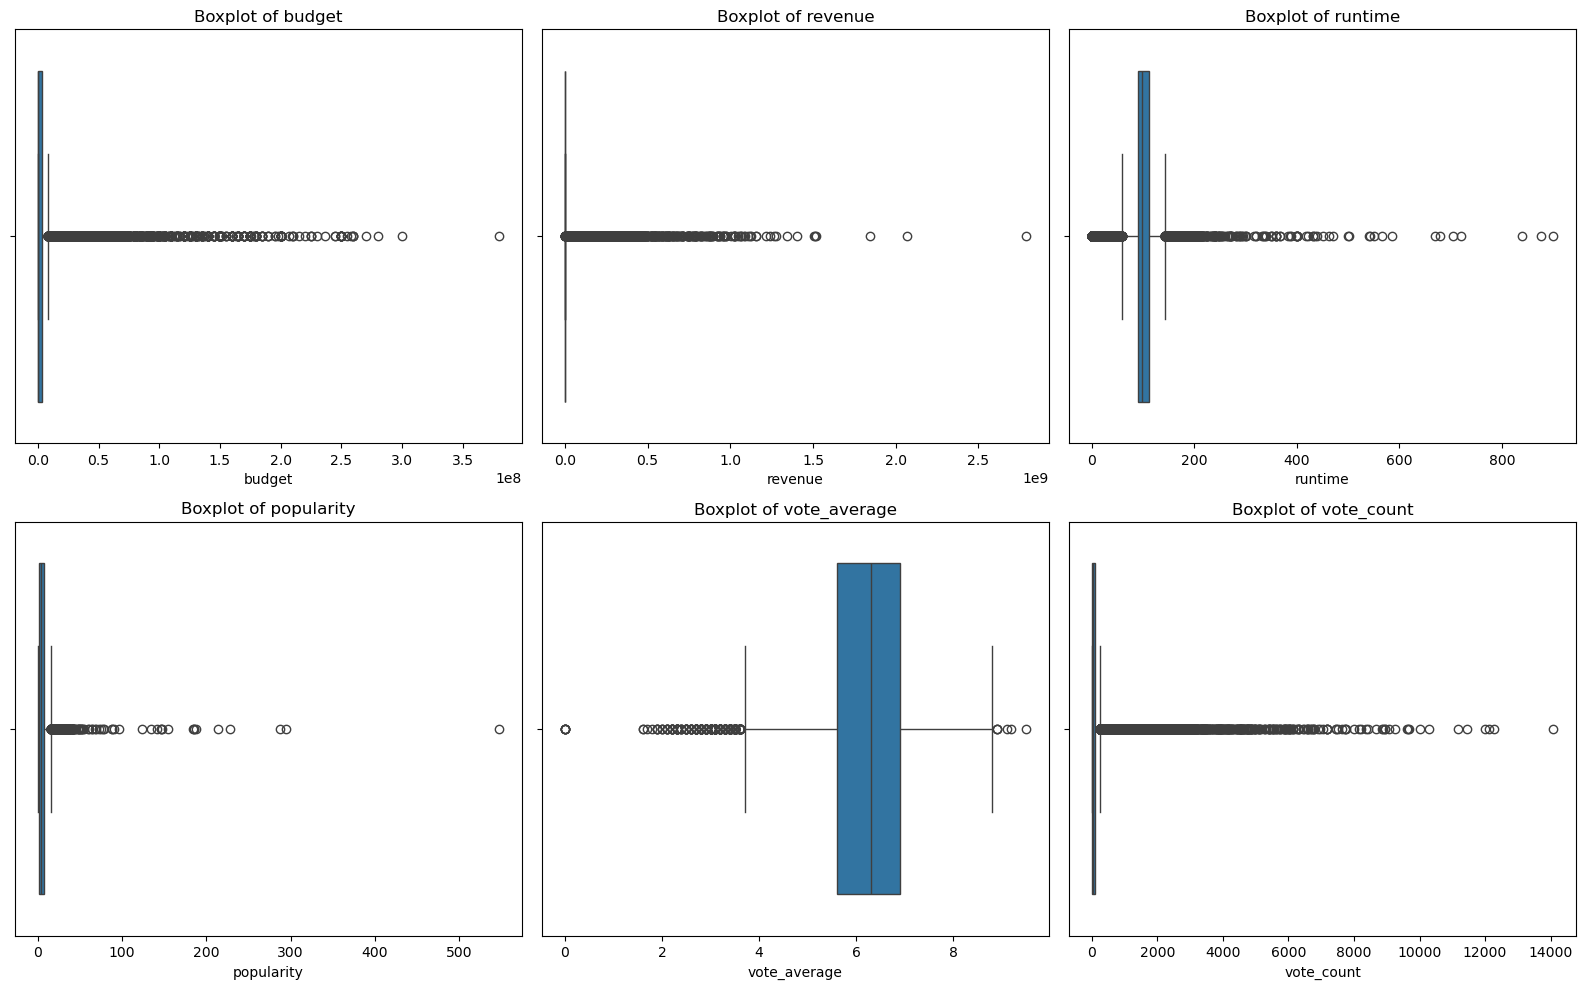

In [23]:
# Let's check for outliers in the numeric columns
numeric_cols = ['budget', 'revenue', 'runtime', 'popularity', 'vote_average', 'vote_count']

# Boxplot for outlier detection
plt.figure(figsize=(16, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=movies[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()